# Softmax

## Introduction

`Softmax` is a multi-dimension version of `sigmoid`. Softmax is used when:

1. Used as a _softer_ max function, as it makes the max value more pronounced in its output.
2. Approximating a probability distribution, because the output of softmax will never exceed $ 1 $ or get below $ 0 $.

## Definition

softmax($ x_i $) = $ \frac{e^{x_i}}{\sum_j e^{x_j}} $

With temparature

softmax($ x_i $, $ t $) = $ \frac{e^{\frac{x_i}{t}}}{\sum_j e^{\frac{x_j}{t}}} $

## How does softmax look, and how it works in code?

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def softmax(x, t = 1):
    exp = np.exp(x / t)

    # sums over the last axis
    sum_exp = exp.sum(-1, keepdims=True)
    
    return exp / sum_exp

Now let's see how softmax approaches the max function

In [3]:
array = np.random.randn(5)
softer_max = softmax(array)
print(array)
print(softer_max)

[-0.16745037 -0.71436991 -0.11082929 -0.15420502 -0.29230533]
[0.22060723 0.12767198 0.23345865 0.22354869 0.19471344]


See how the maximum value gets emphasized and gets a much larger share of probability. Applying weighted average would make it even clearer.

In [4]:
average = array.sum() / array.size
weighted = array @ softer_max
print(average)
print(weighted)
print(array.max())

-0.2878319842173586
-0.24540795037977708
-0.1108292913236926


See how the weighted average gets closer to the real maximum. To make it even closer to max, reduce the temperature.

In [5]:
colder_max = softmax(array, 0.1)
weighted = array @ colder_max
print(average)
print(weighted)
print(array.max())

-0.2878319842173586
-0.14915542393361958
-0.1108292913236926


Softmax is a generalization of sigmoid. Sigmoid can be seen as softmax($ [x, 0] $). Plotting shows that.

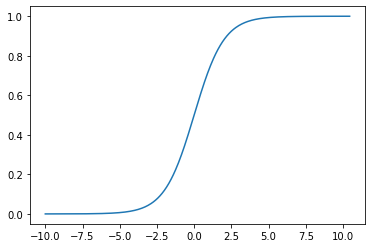

In [6]:
x = np.zeros([410, 2])
x[:, 0] = np.arange(-200, 210) / 20
y = softmax(x)
plt.plot(x[:, 0], y[:, 0])
plt.show()